# Opening the text_eng.pkl file for topic modelling

In [6]:
# Importing important libraries

import pickle

from PyPDF2 import PdfReader
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
# Provide the path to your pickle file
file_path = '/home/pratimathapa/code/PratimaThapa/DisLex_Project/notebooks/text_eng.pkl'

# Read the pickle file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

data.head()


,Country,Text,Language
0,Cambodia,1 \n \n \nKINGDOM OF CAMBODIA \nNATION RELIG...,English
1,India,"1 \n THE DISASTER MANAGEMENT ACT, 2005 \n____...",English
2,Bosnia and Herzegovina,1 \n \nPursuant to Article IV4.a) of the Con...,English
3,Barbados,CHAPTER 160A\nEMERGENCY MANAGEMENT\n2006-20\nT...,English
4,Bangladesh,\nRegistered No. DA -1 \n \nBangladesh Gazet...,English


In [3]:
data.shape


(46, 3)

# Preprocessing the text

In [4]:
def clean(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Removes punctuation
    lowercased = text.lower() # Converts text into lower case
    tokenized = word_tokenize(lowercased) # Tokenizes the words
    words_only = [word for word in tokenized if word.isalpha()] # Removes numbers
    stop_words = set(stopwords.words('english')) # Make English stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Removes stop words
    lemma = WordNetLemmatizer() # Instantiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatizes text
    cleaned = ' '.join(lemmatized) # Join back to a string
    return cleaned


In [7]:
# Applying the function to all text
data['clean_text'] = data.Text.apply(clean)
data.head()


,Country,Text,Language,clean_text
0,Cambodia,1 \n \n \nKINGDOM OF CAMBODIA \nNATION RELIG...,English,kingdom cambodia nation religion king n rkm pr...
1,India,"1 \n THE DISASTER MANAGEMENT ACT, 2005 \n____...",English,disaster management act arragement section cha...
2,Bosnia and Herzegovina,1 \n \nPursuant to Article IV4.a) of the Con...,English,pursuant article constitution bosnia herzegovi...
3,Barbados,CHAPTER 160A\nEMERGENCY MANAGEMENT\n2006-20\nT...,English,chapter emergency management act came operatio...
4,Bangladesh,\nRegistered No. DA -1 \n \nBangladesh Gazet...,English,registered da bangladesh gazette government pe...


# Using Latent Dirichlet Allocation model to find topics in the Disaster law English language text

In [13]:
vectorizer = CountVectorizer()

data_vectorized = vectorizer.fit_transform(data['clean_text'])

lda_model = LatentDirichletAllocation(n_components=5)

lda_vectors = lda_model.fit_transform(data_vectorized)


In [9]:
# Coding a function that prints the words associated with the potential topics

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])


In [14]:
# Printing the topic extracted by the LDA

print_topics(lda_model, vectorizer)


Topic 0:
[('de', 1291.0512261280976), ('le', 615.215268207055), ('la', 566.9450587297281), ('et', 353.1969858145708), ('en', 346.387549326378), ('ou', 279.1999930302883), ('emergency', 264.57913775381076), ('article', 247.11032501495075), ('une', 227.19999397815403), ('declaration', 205.17018110110226)]
Topic 1:
[('emergency', 1399.2213672019209), ('civil', 1087.942450059389), ('act', 915.4855474871035), ('section', 910.3097680748538), ('management', 641.040351802413), ('defence', 639.8069752974437), ('person', 566.3325231745458), ('shall', 455.8066235051491), ('may', 450.4455094407315), ('protection', 403.3820499467642)]
Topic 2:
[('person', 423.35513366241736), ('act', 262.4280425370799), ('officer', 218.02050275386986), ('may', 201.14525262748487), ('offence', 198.95362422271677), ('service', 191.7166450392037), ('member', 191.52090223714387), ('jan', 177.1956124151992), ('force', 171.50298712522743), ('defence', 130.65752226216117)]
Topic 3:
[('disaster', 6761.65023200802), ('shall

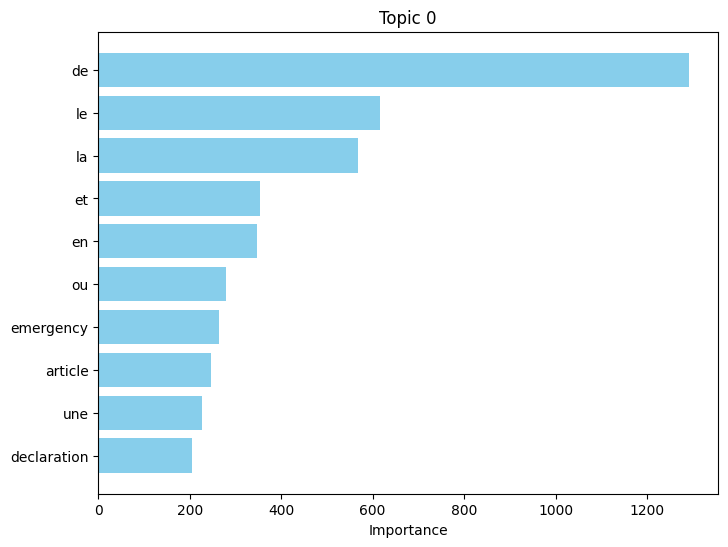

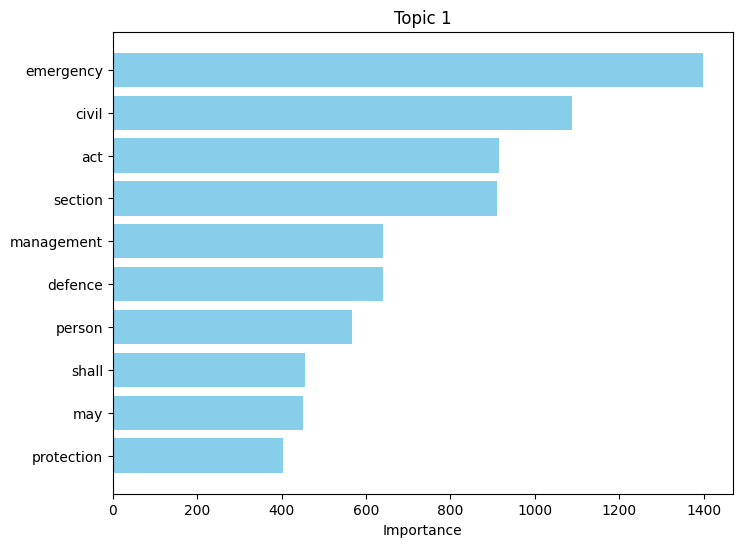

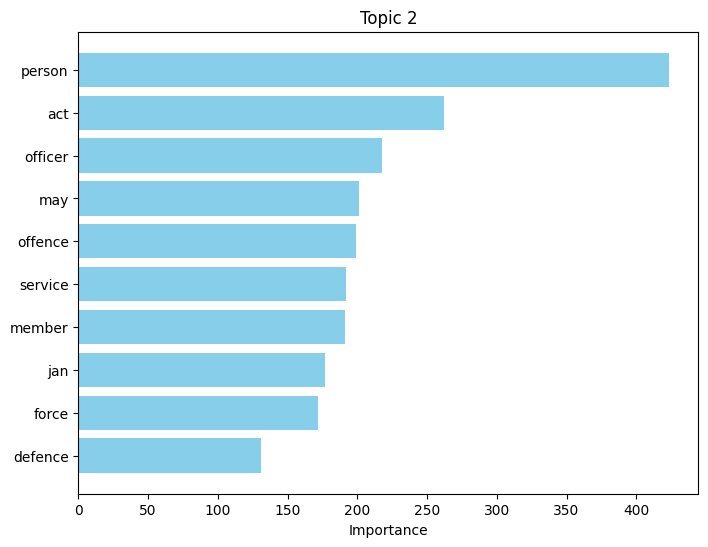

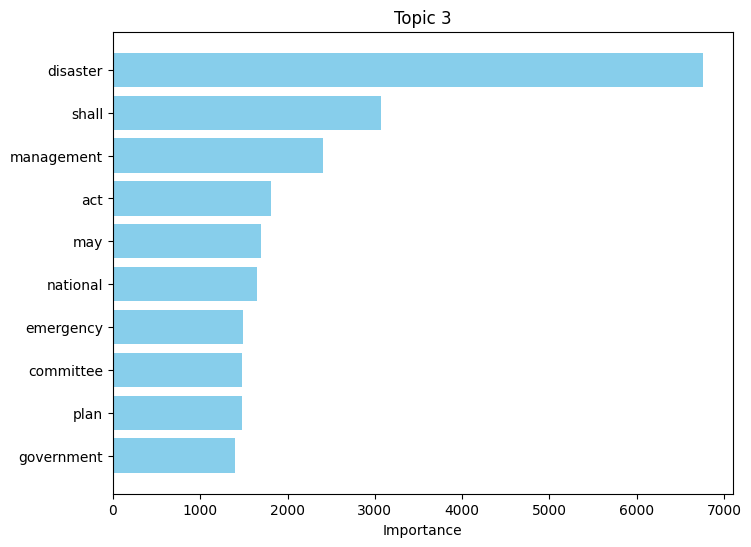

/home/pratimathapa/.pyenv/versions/3.10.6/envs/dislex_project/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


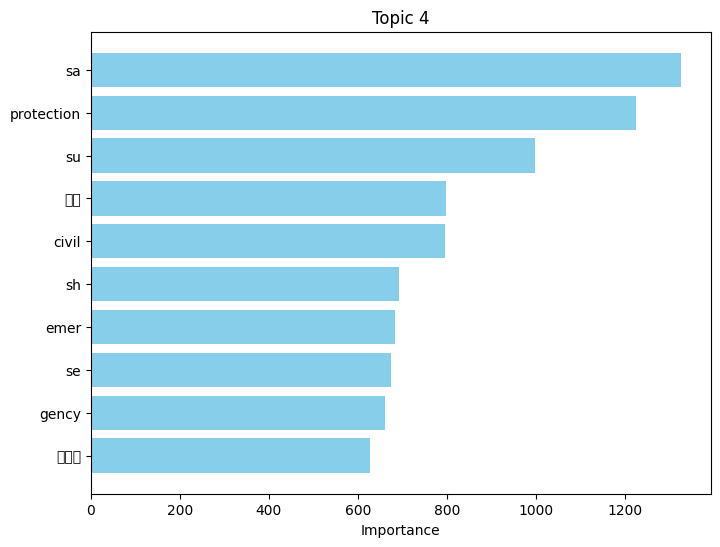

In [15]:
def plot_topics(model, vectorizer, num_words=10):
    # Get the topic terms and their importance scores
    topic_terms = []
    topic_scores = []
    for idx, topic in enumerate(model.components_):
        top_terms_idx = topic.argsort()[:-num_words - 1:-1]
        top_terms = [vectorizer.get_feature_names_out()[i] for i in top_terms_idx]
        top_scores = [topic[i] for i in top_terms_idx]
        topic_terms.append(top_terms)
        topic_scores.append(top_scores)

    # Create a bar plot for each topic
    for i in range(len(topic_terms)):
        plt.figure(figsize=(8, 6))
        plt.barh(topic_terms[i], topic_scores[i], color='skyblue')
        plt.xlabel('Importance')
        plt.title(f'Topic {i}')
        plt.gca().invert_yaxis()  # Invert the y-axis for readability
        plt.show()

# Call the function to plot topics
plot_topics(lda_model, vectorizer)


In [17]:
# Provide the path to your pickle file
file_path = '/home/pratimathapa/code/PratimaThapa/DisLex_Project/notebooks/scanned_eng.pkl'

# Read the pickle file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

data.head()


,Country,Language,Text
0,Eswatini,English,piae jn\nPi SAT OR face\nSUPPLEMENT TO\nTHE\nS...
1,Jamaica,English,16.\n\n17.\n\nDISASTER RISK MANAGEMENT\n\nTHE ...
2,Turks and Caicos Islands,English,Page | of 70\n\n \n\n*\n\nTURKS AND CAICOS IS...
3,The Gambia,English,"\n NATIONAL DISASTER MANAGEMENT ACT, 2008\n\n..."
4,Cook Islands,English,\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nPWNS\n...


In [18]:
# Applying the function to all text
data['clean_text'] = data.Text.apply(clean)
data.head()


,Country,Language,Text,clean_text
0,Eswatini,English,piae jn\nPi SAT OR face\nSUPPLEMENT TO\nTHE\nS...,piae jn pi sat face supplement swaziland gover...
1,Jamaica,English,16.\n\n17.\n\nDISASTER RISK MANAGEMENT\n\nTHE ...,disaster risk management disaster risk managem...
2,Turks and Caicos Islands,English,Page | of 70\n\n \n\n*\n\nTURKS AND CAICOS IS...,page turk caicos island chapter disaster manag...
3,The Gambia,English,"\n NATIONAL DISASTER MANAGEMENT ACT, 2008\n\n...",national disaster management act arrangement s...
4,Cook Islands,English,\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nPWNS\n...,pwns cook island legislation supplement disast...


In [19]:
vectorizer = CountVectorizer()

data_vectorized = vectorizer.fit_transform(data['clean_text'])

lda_model = LatentDirichletAllocation(n_components=5)

lda_vectors = lda_model.fit_transform(data_vectorized)


In [20]:
# Printing the topic extracted by the LDA

print_topics(lda_model, vectorizer)


Topic 0:
[('state', 62.03360637521701), ('president', 29.00515895276019), ('public', 24.039430472638404), ('law', 19.058457334397243), ('assistance', 18.666991067689438), ('micronesia', 18.19909062082397), ('government', 17.500967993135326), ('federated', 17.19908767658693), ('congress', 16.199088616368563), ('presidential', 14.187451710121543)]
Topic 1:
[('disaster', 1604.265909850812), ('management', 677.4512099689721), ('shall', 632.4815307335168), ('act', 440.6671909604331), ('committee', 440.1999354492182), ('national', 425.489434097979), ('may', 374.2678123753425), ('agency', 349.94342945573294), ('regional', 310.1999493849803), ('person', 271.9773995271683)]
Topic 2:
[('repealed', 0.20000057476449293), ('affair', 0.2000005190501096), ('civil', 0.20000050543647568), ('kind', 0.20000047699253623), ('distributed', 0.20000047270248525), ('restoring', 0.20000045611117884), ('survey', 0.20000045431948443), ('efficient', 0.20000045096506963), ('entering', 0.2000004480367558), ('become'

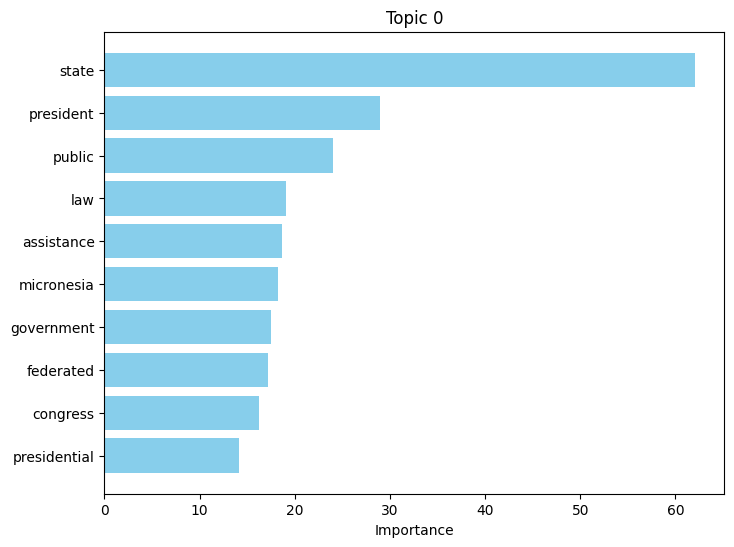

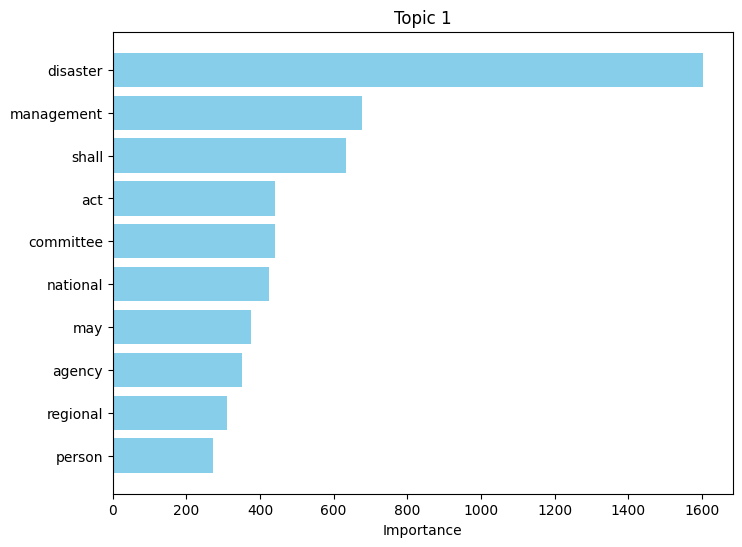

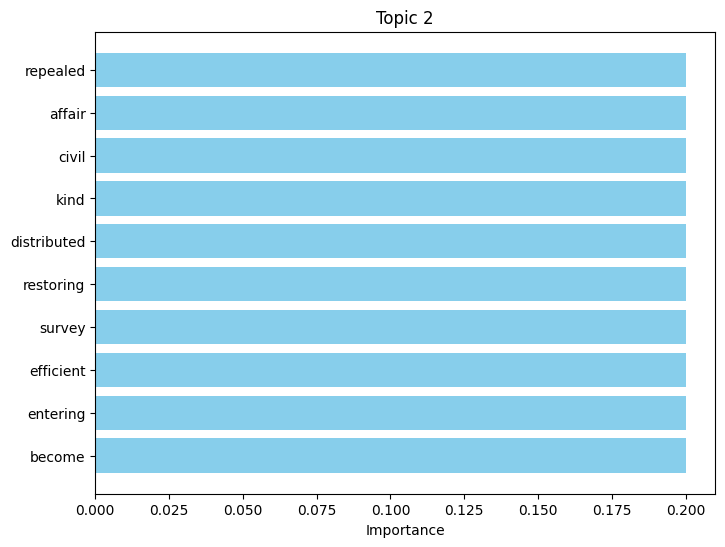

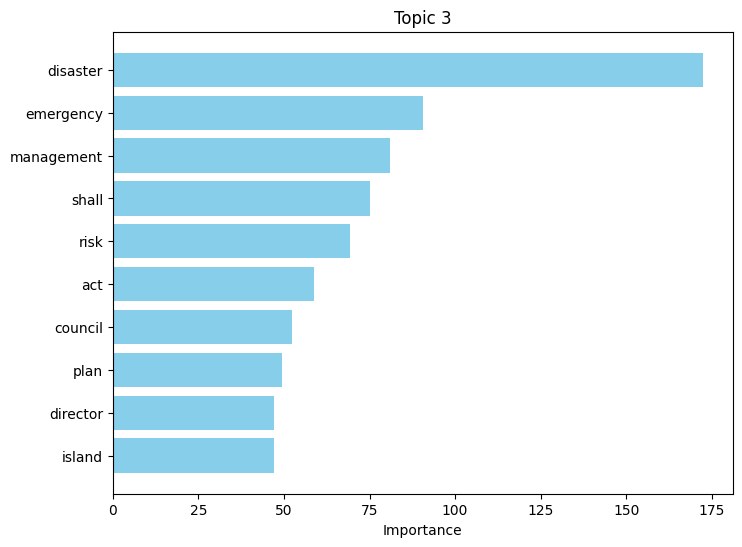

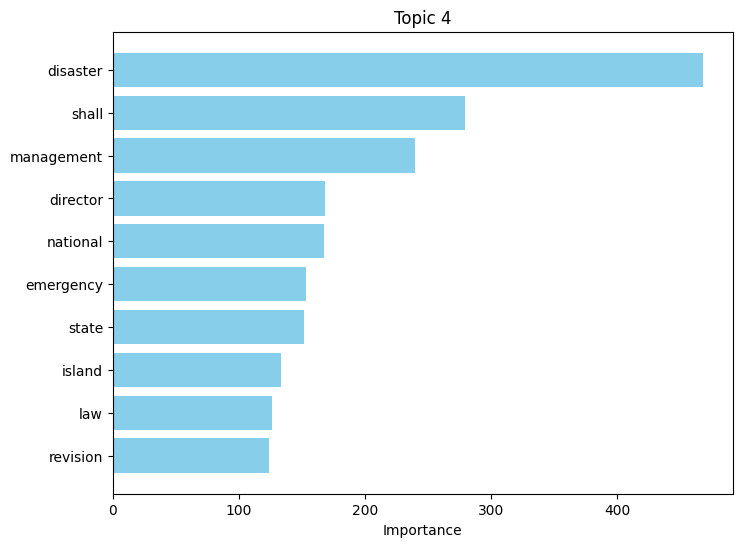

In [21]:
def plot_topics(model, vectorizer, num_words=10):
    # Get the topic terms and their importance scores
    topic_terms = []
    topic_scores = []
    for idx, topic in enumerate(model.components_):
        top_terms_idx = topic.argsort()[:-num_words - 1:-1]
        top_terms = [vectorizer.get_feature_names_out()[i] for i in top_terms_idx]
        top_scores = [topic[i] for i in top_terms_idx]
        topic_terms.append(top_terms)
        topic_scores.append(top_scores)

    # Create a bar plot for each topic
    for i in range(len(topic_terms)):
        plt.figure(figsize=(8, 6))
        plt.barh(topic_terms[i], topic_scores[i], color='skyblue')
        plt.xlabel('Importance')
        plt.title(f'Topic {i}')
        plt.gca().invert_yaxis()  # Invert the y-axis for readability
        plt.show()

# Call the function to plot topics
plot_topics(lda_model, vectorizer)
